In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Exploratory Data Analysis

### 1) Quick sanity checks

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


- Dataset has 1338 records.
- Average age: 39 (range 18–64).
- Average BMI: 30.6 → slightly overweight; range 16–53.
- Children: Most have 0–1 child; max 5.
- Average expenses: $13.2k; range $1.1k–$63.7k → highly variable, right-skewed.

In [5]:
# Categorical features
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2) Missing values & data types

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

### 3) Unique values for categorical columns

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

### 4) Univariate analysis — numeric features

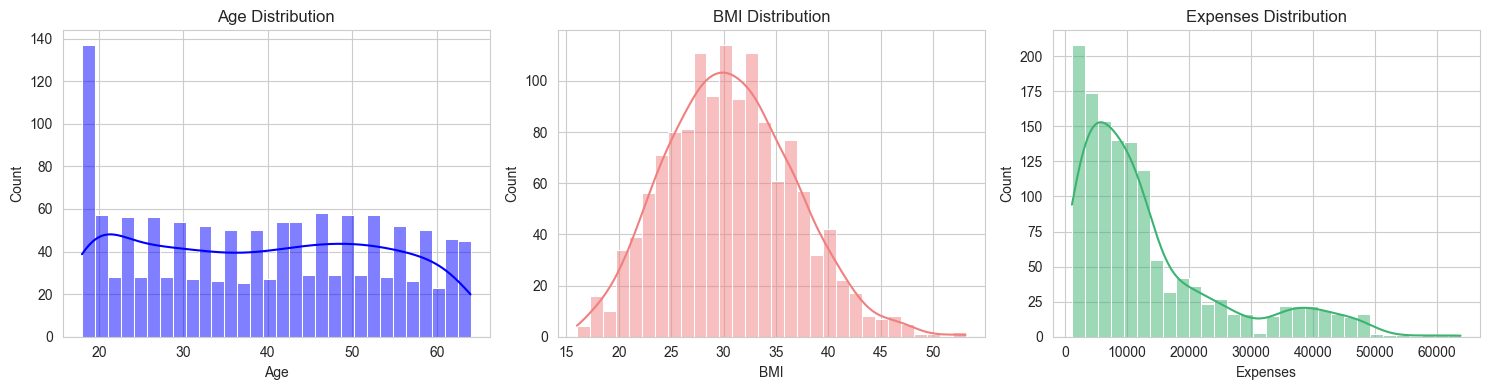

In [12]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(1,3,figsize=(15,4))

# Plot 1: Age
sns.histplot(df['age'],bins = 30,kde=True,color="blue",ax=ax[0])
ax[0].set_title("Age Distribution",fontsize = 12)
ax[0].set_xlabel("Age")

# Plot 2: BMI
sns.histplot(df['bmi'], bins=30, kde=True, color='lightcoral', ax=ax[1])
ax[1].set_title('BMI Distribution', fontsize=12)
ax[1].set_xlabel('BMI')

# Plot 3: Expenses
sns.histplot(df['expenses'], bins=30, kde=True, color='mediumseagreen', ax=ax[2])
ax[2].set_title('Expenses Distribution', fontsize=12)
ax[2].set_xlabel('Expenses')

plt.tight_layout()
plt.show()


In [13]:
print(df[['age','bmi','expenses']].skew())
print("--------------------------------------")
print(df[['age','bmi','expenses']].kurtosis())

age         0.055673
bmi         0.284593
expenses    1.515880
dtype: float64
--------------------------------------
age        -1.245088
bmi        -0.053370
expenses    1.606299
dtype: float64


📊 Skewness Insights:
- Age: Slightly right-skewed (0.0557) – very close to symmetric.
- BMI: Mildly right-skewed (0.2846) – distribution leans slightly right.
- Expenses: Moderately right-skewed (1.5159) – longer right tail.

🧮 Kurtosis Insights:
- Age: Platykurtic (-1.2451) – flatter distribution, lighter tails.
- BMI: Nearly normal (-0.0534) – close to Gaussian kurtosis.
- Expenses: Leptokurtic (1.6063) – more peaked, heavier tails (outliers likely).

## 5) Univariate analysis — categorical features

<Axes: xlabel='smoker', ylabel='count'>

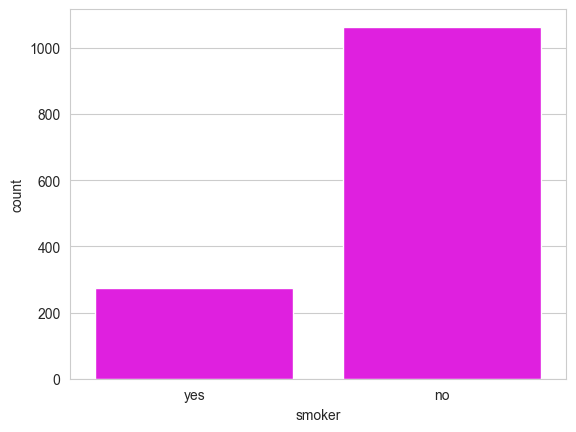

In [19]:
sns.countplot(data=df, x='smoker',color = "magenta")

<Axes: xlabel='smoker', ylabel='expenses'>

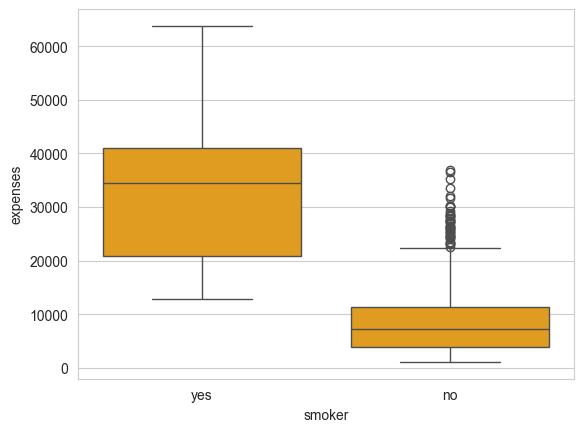

In [17]:
sns.boxplot(data=df, x='smoker', y='expenses',color = "orange")

## 6. Bivariate analysis — numeric vs numeric

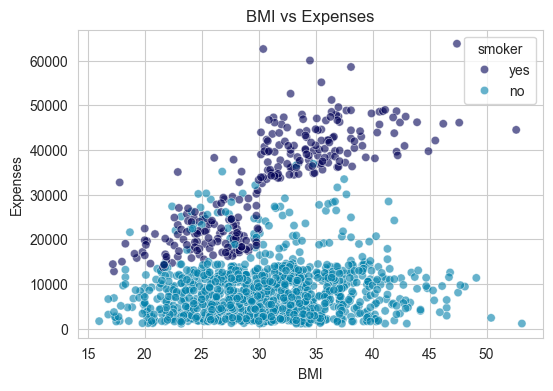

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker', palette='ocean', alpha=0.6)
plt.title('BMI vs Expenses')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

- Smokers have much higher medical expenses than non-smokers.
- Expenses increase with BMI, especially for smokers.
- Non-smokers stay mostly under ₹20k–₹25k, while smokers often exceed ₹30k+.
- Smoking and high BMI together lead to very high costs.

In [29]:
df.groupby('smoker')['expenses'].agg(['count','mean','median','std']).reset_index()


,smoker,count,mean,median,std
0,no,1064,8434.268449,7345.405,5993.781756
1,yes,274,32050.231971,34456.350,11541.547338


In [27]:
df.groupby(['region','sex'])['expenses'].mean().unstack()


sex,female,male
region,,
northeast,12953.203106,13854.005767
northwest,12479.870244,12354.119317
southeast,13499.669257,15879.617354
southwest,11274.411667,13412.884233


- **Males** have higher expenses than females in all regions.
- **Southeast** has the **highest** costs; **Southwest** the **lowest**.
- Expenses vary by both **gender and region**.


Text(0.5, 1.0, 'Correlation Matrix')

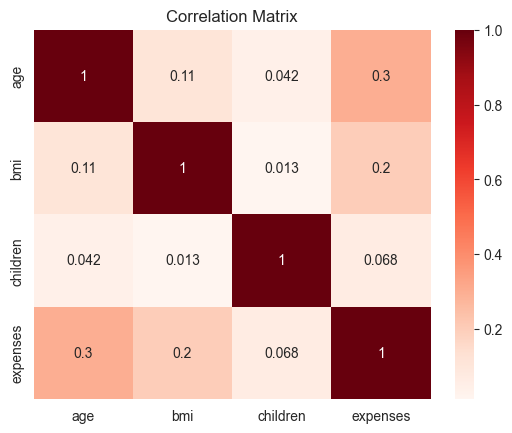

In [33]:
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')